<a href="https://colab.research.google.com/github/P44mahisrivastava/DSA-Files/blob/main/AI_Hand_Written_Digit_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

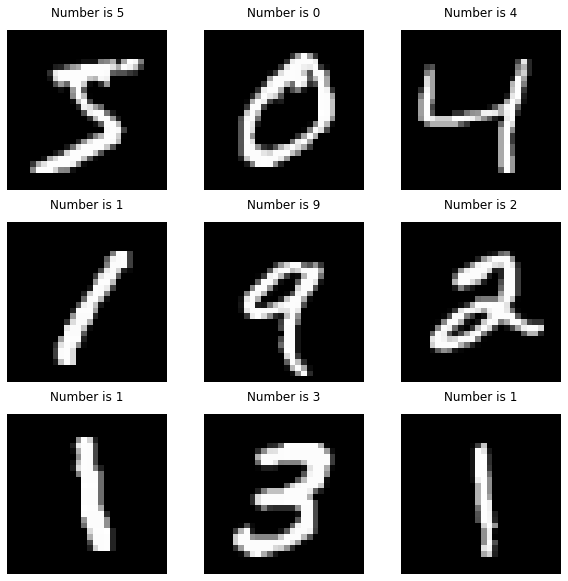

In [9]:
import matplotlib.pyplot as plt
#%matplotlib inline
fig, axs=plt.subplots(3, 3,figsize=(10,10))
plt.gray()
for i,ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number is {}'.format(y_train[i]))
fig.show()  


Number is 5


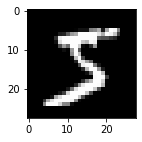

Number is 0


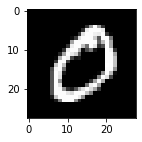

Number is 4


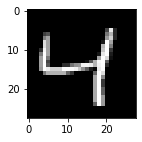

Number is 1


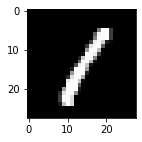

Number is 9


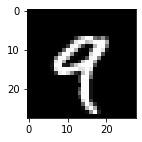

Number is 2


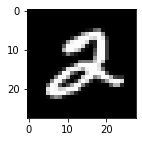

Number is 1


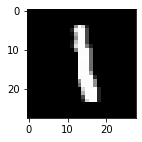

Number is 3


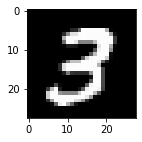

Number is 1


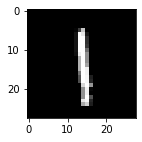

Number is 4


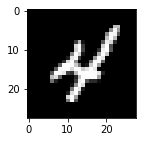

In [7]:
for i in range(0,10):
  plt.figure(figsize=(2,2))
  plt.imshow(x_train[i])
  print('Number is {}'.format(y_train[i]))
  plt.show()

In [10]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
print(x_train.ndim)

4


In [12]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train:',x_train.shape[0])
print('Number of images in x_test:',x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000
Number of images in x_test: 10000


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0832 - accuracy: 0.9739
Epoch 2/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0560 - accuracy: 0.9819
Epoch 3/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0451 - accuracy: 0.9852


In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0507 - accuracy: 0.9843


[0.05072743073105812, 0.9843000173568726]